In [52]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_co2_raw = pd.read_csv('data/Week-04/SYB60_T25_Carbon Dioxide Emission Estimates.csv', skiprows=1,)
df_co2_raw.head(10)

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",1975,Emissions (thousand metric tons of carbon diox...,"16,853,532",NaN,Carbon Dioxide Information Analysis Center (CD...
1,1,"Total, all countries or areas",1985,Emissions (thousand metric tons of carbon diox...,"19,864,139",NaN,Carbon Dioxide Information Analysis Center (CD...
2,1,"Total, all countries or areas",1995,Emissions (thousand metric tons of carbon diox...,"23,120,435",NaN,Carbon Dioxide Information Analysis Center (CD...
3,1,"Total, all countries or areas",2005,Emissions (thousand metric tons of carbon diox...,"29,490,014",NaN,Carbon Dioxide Information Analysis Center (CD...
4,1,"Total, all countries or areas",2010,Emissions (thousand metric tons of carbon diox...,"33,472,376",NaN,Carbon Dioxide Information Analysis Center (CD...
5,1,"Total, all countries or areas",2012,Emissions (thousand metric tons of carbon diox...,"35,470,891",NaN,Carbon Dioxide Information Analysis Center (CD...
6,1,"Total, all countries or areas",2013,Emissions (thousand metric tons of carbon diox...,"35,837,591",NaN,Carbon Dioxide Information Analysis Center (CD...
7,1,"Total, all countries or areas",2014,Emissions (thousand metric tons of carbon diox...,"36,138,285",NaN,Carbon Dioxide Information Analysis Center (CD...
8,1,"Total, all countries or areas",1975,Emissions per capita (metric tons of carbon di...,4.1,NaN,Carbon Dioxide Information Analysis Center (CD...
9,1,"Total, all countries or areas",1985,Emissions per capita (metric tons of carbon di...,4.1,NaN,Carbon Dioxide Information Analysis Center (CD...


In [36]:
df_co2_country = df_co2_raw.iloc[16:,:]
df_co2_country.shape

(3292, 7)

In [65]:
df_co2_country['Value'] = df_co2_country.Value.map(lambda x: x.replace(',','')).astype(np.float64)

g:\developments\notebooks-3.0\env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [72]:
df_co2_country.rename(columns={'Unnamed: 1': 'Country'},  inplace=True)

g:\developments\notebooks-3.0\env\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [73]:
df_co2_country.Series.unique()

array(['Emissions (thousand metric tons of carbon dioxide)',
       'Emissions per capita (metric tons of carbon dioxide)'],
      dtype=object)

In [74]:
df_co2_emissions = df_co2_country[df_co2_country.Series=='Emissions (thousand metric tons of carbon dioxide)']
df_co2_emissions.head()

,Region/Country/Area,Country,Year,Series,Value,Footnotes,Source
16,4,Afghanistan,1975,Emissions (thousand metric tons of carbon diox...,2127.0,NaN,Carbon Dioxide Information Analysis Center (CD...
17,4,Afghanistan,1985,Emissions (thousand metric tons of carbon diox...,3509.0,NaN,Carbon Dioxide Information Analysis Center (CD...
18,4,Afghanistan,1995,Emissions (thousand metric tons of carbon diox...,1243.0,NaN,Carbon Dioxide Information Analysis Center (CD...
19,4,Afghanistan,2005,Emissions (thousand metric tons of carbon diox...,1327.0,NaN,Carbon Dioxide Information Analysis Center (CD...
20,4,Afghanistan,2010,Emissions (thousand metric tons of carbon diox...,8463.0,NaN,Carbon Dioxide Information Analysis Center (CD...


In [75]:
df_co2_percapita = df_co2_country[df_co2_country.Series!='Emissions (thousand metric tons of carbon dioxide)']
df_co2_percapita.head()

,Region/Country/Area,Country,Year,Series,Value,Footnotes,Source
24,4,Afghanistan,1975,Emissions per capita (metric tons of carbon di...,0.1,NaN,Carbon Dioxide Information Analysis Center (CD...
25,4,Afghanistan,1985,Emissions per capita (metric tons of carbon di...,0.3,NaN,Carbon Dioxide Information Analysis Center (CD...
26,4,Afghanistan,1995,Emissions per capita (metric tons of carbon di...,0.1,NaN,Carbon Dioxide Information Analysis Center (CD...
27,4,Afghanistan,2005,Emissions per capita (metric tons of carbon di...,0.0,NaN,Carbon Dioxide Information Analysis Center (CD...
28,4,Afghanistan,2010,Emissions per capita (metric tons of carbon di...,0.3,NaN,Carbon Dioxide Information Analysis Center (CD...


In [76]:
print('Emission: {}'.format(df_co2_emissions.shape[0]))
print('Emission percapita: {}'.format(df_co2_percapita.shape[0]))

Emission: 1649
Emission percapita: 1643


In [77]:
df_co2_percapita.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1643 entries, 24 to 3307
Data columns (total 7 columns):
Region/Country/Area    1643 non-null int64
Country                1643 non-null object
Year                   1643 non-null int64
Series                 1643 non-null object
Value                  1643 non-null float64
Footnotes              32 non-null object
Source                 1643 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 102.7+ KB


In [81]:
df_co2_percapita[df_co2_percapita.Country=='Indonesia']

,Region/Country/Area,Country,Year,Series,Value,Footnotes,Source
1456,360,Indonesia,1975,Emissions per capita (metric tons of carbon di...,0.4,NaN,Carbon Dioxide Information Analysis Center (CD...
1457,360,Indonesia,1985,Emissions per capita (metric tons of carbon di...,0.7,NaN,Carbon Dioxide Information Analysis Center (CD...
1458,360,Indonesia,1995,Emissions per capita (metric tons of carbon di...,1.1,NaN,Carbon Dioxide Information Analysis Center (CD...
1459,360,Indonesia,2005,Emissions per capita (metric tons of carbon di...,1.5,NaN,Carbon Dioxide Information Analysis Center (CD...
1460,360,Indonesia,2010,Emissions per capita (metric tons of carbon di...,1.8,NaN,Carbon Dioxide Information Analysis Center (CD...
1461,360,Indonesia,2012,Emissions per capita (metric tons of carbon di...,2.6,NaN,Carbon Dioxide Information Analysis Center (CD...
1462,360,Indonesia,2013,Emissions per capita (metric tons of carbon di...,1.9,NaN,Carbon Dioxide Information Analysis Center (CD...
1463,360,Indonesia,2014,Emissions per capita (metric tons of carbon di...,1.8,NaN,Carbon Dioxide Information Analysis Center (CD...


In [83]:
df_co2_percapita.describe()


,Region/Country/Area,Year,Value
count,1643.000000,1643.000000,1643.000000
mean,424.707243,2002.234936,4.939866
std,248.943769,13.133005,6.885939
min,4.000000,1975.000000,0.000000
25%,214.000000,1995.000000,0.600000
50%,422.000000,2010.000000,2.500000
75%,638.000000,2013.000000,6.700000
max,894.000000,2014.000000,67.300000


In [85]:
df_co2_percapita[df_co2_percapita.Value==df_co2_percapita.Value.max()]

,Region/Country/Area,Country,Year,Series,Value,Footnotes,Source
2406,634,Qatar,1975,Emissions per capita (metric tons of carbon di...,67.3,NaN,Carbon Dioxide Information Analysis Center (CD...


In [88]:
df_co2_percapita[df_co2_percapita.Value==df_co2_percapita.Value.min()]

,Region/Country/Area,Country,Year,Series,Value,Footnotes,Source
27,4,Afghanistan,2005,Emissions per capita (metric tons of carbon di...,0.0,NaN,Carbon Dioxide Information Analysis Center (CD...
352,64,Bhutan,1975,Emissions per capita (metric tons of carbon di...,0.0,NaN,Carbon Dioxide Information Analysis Center (CD...
482,854,Burkina Faso,1975,Emissions per capita (metric tons of carbon di...,0.0,NaN,Carbon Dioxide Information Analysis Center (CD...
498,108,Burundi,1975,Emissions per capita (metric tons of carbon di...,0.0,NaN,Carbon Dioxide Information Analysis Center (CD...
499,108,Burundi,1985,Emissions per capita (metric tons of carbon di...,0.0,NaN,Carbon Dioxide Information Analysis Center (CD...
500,108,Burundi,1995,Emissions per capita (metric tons of carbon di...,0.0,NaN,Carbon Dioxide Information Analysis Center (CD...
501,108,Burundi,2005,Emissions per capita (metric tons of carbon di...,0.0,NaN,Carbon Dioxide Information Analysis Center (CD...
502,108,Burundi,2010,Emissions per capita (metric tons of carbon di...,0.0,NaN,Carbon Dioxide Information Analysis Center (CD...
503,108,Burundi,2012,Emissions per capita (metric tons of carbon di...,0.0,NaN,Carbon Dioxide Information Analysis Center (CD...
504,108,Burundi,2013,Emissions per capita (metric tons of carbon di...,0.0,NaN,Carbon Dioxide Information Analysis Center (CD...


In [84]:
df_co2_emissions.describe()

,Region/Country/Area,Year,Value
count,1649.000000,1649.000000,1.649000e+03
mean,426.065494,2002.256519,1.267577e+05
std,249.505225,13.119931,6.498829e+05
min,4.000000,1975.000000,4.000000e+00
25%,214.000000,1995.000000,6.970000e+02
50%,422.000000,2010.000000,5.603000e+03
75%,638.000000,2013.000000,4.717600e+04
max,894.000000,2014.000000,1.029193e+07


In [87]:
df_co2_emissions[df_co2_emissions.Value==df_co2_emissions.Value.max()]

,Region/Country/Area,Country,Year,Series,Value,Footnotes,Source
641,156,China,2014,Emissions (thousand metric tons of carbon diox...,10291927.0,"For statistical purposes, the data for China d...",Carbon Dioxide Information Analysis Center (CD...


In [89]:
df_co2_emissions[df_co2_emissions.Value==df_co2_emissions.Value.min()]

,Region/Country/Area,Country,Year,Series,Value,Footnotes,Source
344,64,Bhutan,1975,Emissions (thousand metric tons of carbon diox...,4.0,NaN,Carbon Dioxide Information Analysis Center (CD...
2206,570,Niue,1975,Emissions (thousand metric tons of carbon diox...,4.0,NaN,Carbon Dioxide Information Analysis Center (CD...
2207,570,Niue,1985,Emissions (thousand metric tons of carbon diox...,4.0,NaN,Carbon Dioxide Information Analysis Center (CD...
2209,570,Niue,2005,Emissions (thousand metric tons of carbon diox...,4.0,NaN,Carbon Dioxide Information Analysis Center (CD...
2210,570,Niue,2010,Emissions (thousand metric tons of carbon diox...,4.0,NaN,Carbon Dioxide Information Analysis Center (CD...
2502,654,Saint Helena,1985,Emissions (thousand metric tons of carbon diox...,4.0,NaN,Carbon Dioxide Information Analysis Center (CD...


In [90]:
df_co2_emissions_china = df_co2_emissions[df_co2_emissions.Country=='China']
df_co2_percapita_china = df_co2_percapita[df_co2_percapita.Country=='China']

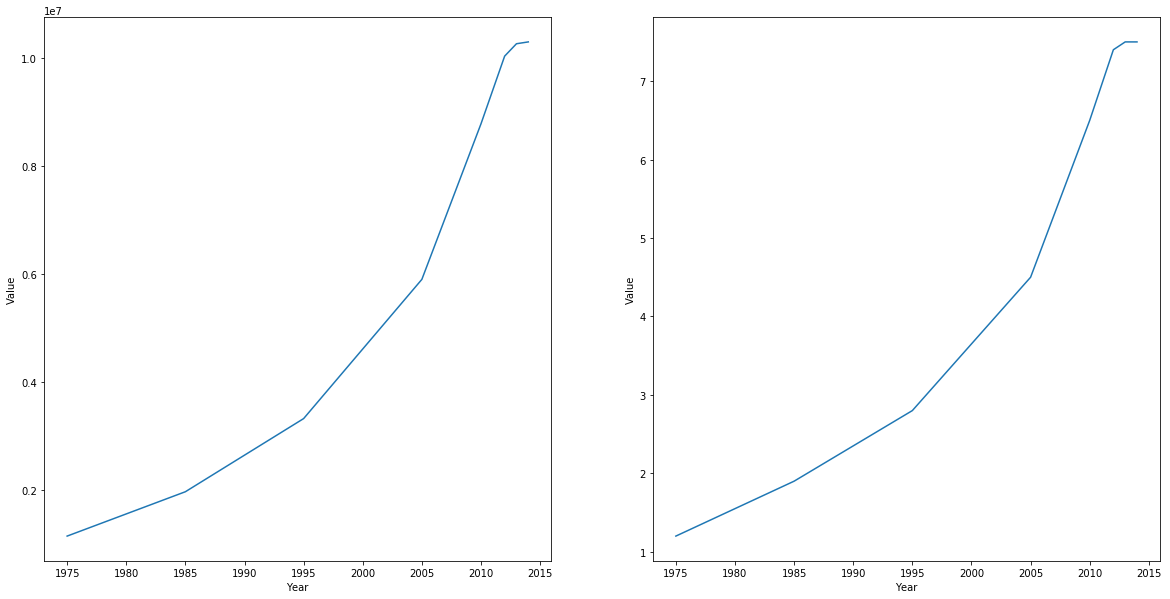

In [94]:
f, ax =  plt.subplots(1,2, figsize=(20,10), sharex=True)
sns.lineplot('Year', 'Value', data=df_co2_emissions_china, ax=ax[0])
sns.lineplot('Year', 'Value', data=df_co2_percapita_china, ax=ax[1])
plt.show()

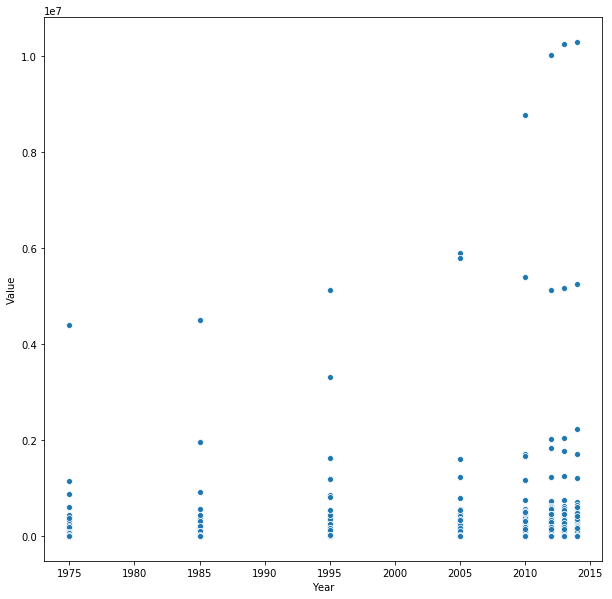

In [98]:
f, ax = plt.subplots(figsize=(10,10))
sns.scatterplot('Year', 'Value', data=df_co2_emissions, ax=ax)
plt.show()

In [99]:
len(df_co2_country.Country.unique())

222